<h2 style = "color: red;font-size:27px;text-align:center">DETERMINING THE POSSIBILITY OF FATALITIES IN A PLANE CRASH</h2>

## Sheriff Ayobami Nas'r(2023)

<img style ="height:500px; width:1000px" src="Media/crashpic.jpg" alt="#">

## 1.0 INTRODUCTION

A plane crash refers to an event where an aircraft, whether it's a commercial airliner, private plane, or military aircraft, experiences a loss of control resulting in a sudden impact with the ground or water, often causing significant damage or fatalities. These incidents can occur due to a myriad of factors, typically not a singular cause but a chain of events or a combination of factors.

Mechanical failures, such as engine problems, structural issues, or equipment malfunction, can lead to a crash. Adverse weather conditions like storms, fog, or strong winds may impair visibility or cause turbulence, contributing to accidents. Human error, encompassing pilot mistakes, miscommunication, fatigue, or errors in judgment, remains a major factor in many crashes.

Additionally, factors such as inadequate maintenance, faulty equipment, air traffic control errors, navigation mistakes, intentional actions like sabotage or terrorism, and even bird strikes can precipitate a crash. The aviation industry continually works on enhancing safety measures through stringent regulations, advanced technology, improved training, and thorough investigations following accidents to identify and rectify weaknesses.

Despite these efforts, unexpected circumstances or a combination of factors can lead to tragic plane crashes, underlining the ongoing necessity for constant vigilance, improved safety measures, and advancements in aviation technology and procedures to prevent such disasters.

Moreover, in this project, i considered developing a classification system to predict the possibility of fatalities in the next plane crash.
I explored the dataset, cleaned it, then turn several classification models to selects the best performing one.



## 2.0 Importation of Packages

In [190]:
## Data loading and manipulation

import pandas as pd
import numpy as np
import warnings
import pickle as pkl
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data modelling
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [191]:
df = pd.read_csv('datasets/Airplane_Crashes.csv')

The Airplane crash datasets which shows the record of the plane crashes of a particular company from 1908-2009 was gotten from <a style = "text-decoration:none; color:red" href = "https://www.kaggle.com/datasets/kevindkersey/airplane-crashes-and-fatalities-19082009">Kaggle</a>

## 3.0 Exploratory Data Analysis

During this project phase, the dataset underwent analysis and investigation to outline its primary characteristics. This process aids in determining the most effective methods to manipulate the dataset for optimal model performance, including leveraging patterns, identifying and addressing anomalies, testing hypotheses, and validating assumptions.

## 3.1 BRIEF OVERVIEW

In [181]:
df.head(10)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...
6,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,NaN,NaN,21.0,NaN,NaN,0.0,Crashed into trees while attempting to land af...
7,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,NaN,NaN,19.0,NaN,NaN,0.0,"Exploded and burned near Neuwerk Island, when..."
8,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,NaN,NaN,20.0,NaN,NaN,0.0,"Crashed near the Black Sea, cause unknown."
9,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,NaN,NaN,22.0,NaN,NaN,0.0,Shot down by British aircraft crashing in flames.


In [187]:
df.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4949.000000,4738.000000,4741.000000,4959.000000,4725.000000,4726.000000,4926.000000
mean,31.088301,26.898691,4.479646,22.338173,19.017566,3.579348,1.728177
std,45.438282,44.010591,3.489021,35.026176,34.114849,3.170223,55.708966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [138]:
df['Date'].describe()

count           4967
unique          4539
top       08/31/1988
freq               4
Name: Date, dtype: object

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4192 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

### Observation: 
The datasets has 16 columns with 4966 entries. It contains both floats and objects. considering the available variables, Fatalities is a target variable.

### 3.2 Suggestions for preprocessing:
"Summary" as a column will be dropped because it is only a short note. 

In [192]:
df2 = df.drop(['Summary'],axis = 1)

In [193]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4192 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

## In this phase of the project, I will be filling the NA as almost all columns entries are missing 

3.3 HANDLING OF NA

In [194]:
df2['Time'] = df2['Time'].fillna(df2['Time'].mode()[0])

In [195]:
df2['Ground'] = df2['Ground'].fillna(df2['Ground'].mode()[0])

In [196]:
df2['Location'] = df2['Location'].fillna(df2['Location'].mode()[0])

In [197]:
df2['Operator'] = df2['Operator'].fillna(df2['Operator'].mode()[0])

In [198]:
df2['Flight #'] = df2['Flight #'].fillna(df2['Flight #'].mode()[0])

In [199]:
df2['Route'] = df2['Route'].fillna(df2['Route'].mode()[0])

In [200]:
df2['AC Type'] = df2['AC Type'].fillna(df2['AC Type'].mode()[0])

In [201]:
df2['Registration'] = df2['Registration'].fillna(df2['Registration'].mode()[0])

In [202]:
df2['cn/ln'] = df2['cn/ln'].fillna(df2['cn/ln'].mode()[0])

In [203]:
df2['Aboard'] = df2['Aboard'].fillna(df2['Aboard'].mode()[0])

In [204]:
df2['Aboard Passangers'] = df2['Aboard Passangers'].fillna(df2['Aboard Passangers'].mode()[0])

In [205]:
df2['Aboard Crew'] = df2['Aboard Crew'].fillna(df2['Aboard Crew'].mode()[0])

In [206]:
df2['Fatalities'] = df2['Fatalities'].fillna(df2['Fatalities'].mode()[0])

In [207]:
df2['Fatalities Passangers'] = df2['Fatalities Passangers'].fillna(df2['Fatalities Passangers'].mode()[0])

In [208]:
df2['Fatalities Crew'] = df2['Fatalities Crew'].fillna(df2['Fatalities Crew'].mode()[0])

In [209]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   4967 non-null   object 
 2   Location               4967 non-null   object 
 3   Operator               4967 non-null   object 
 4   Flight #               4967 non-null   object 
 5   Route                  4967 non-null   object 
 6   AC Type                4967 non-null   object 
 7   Registration           4967 non-null   object 
 8   cn/ln                  4967 non-null   object 
 9   Aboard                 4967 non-null   float64
 10  Aboard Passangers      4967 non-null   float64
 11  Aboard Crew            4967 non-null   float64
 12  Fatalities             4967 non-null   float64
 13  Fatalities Passangers  4967 non-null   float64
 14  Fatalities Crew        4967 non-null   float64
 15  Grou

### 3.4 In this phase of the project, i will be handling the objects; converting them to floats and integer for proper pictoral represention and modeling

In [210]:
categories = df2.select_dtypes(include=('object')).columns

In [211]:
categories

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln'],
      dtype='object')

In [212]:
encoder = LabelEncoder()

In [213]:
df2['Time'] = encoder.fit_transform(df2['Time'])

In [214]:
df2['Date'] = encoder.fit_transform(df2['Date'])

In [215]:
df2['Location'] = encoder.fit_transform(df2['Location'])

In [216]:
df2['Operator'] = encoder.fit_transform(df2['Operator'])

In [217]:
df2['Flight #'] = encoder.fit_transform(df2['Flight #'])

In [218]:
df2['AC Type'] = encoder.fit_transform(df2['AC Type'])

In [219]:
df2['Route'] = encoder.fit_transform(df2['Route'])

In [220]:
df2['Registration'] = encoder.fit_transform(df2['Registration'])

In [221]:
df2['cn/ln'] = encoder.fit_transform(df2['cn/ln'])

In [222]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   int32  
 1   Time                   4967 non-null   int32  
 2   Location               4967 non-null   int32  
 3   Operator               4967 non-null   int32  
 4   Flight #               4967 non-null   int32  
 5   Route                  4967 non-null   int32  
 6   AC Type                4967 non-null   int32  
 7   Registration           4967 non-null   int32  
 8   cn/ln                  4967 non-null   int32  
 9   Aboard                 4967 non-null   float64
 10  Aboard Passangers      4967 non-null   float64
 11  Aboard Crew            4967 non-null   float64
 12  Fatalities             4967 non-null   float64
 13  Fatalities Passangers  4967 non-null   float64
 14  Fatalities Crew        4967 non-null   float64
 15  Grou

## 3.5 Target Variable

In this level of EDA, the target variable is visualized to know how each of the variable is visualized.

<Axes: xlabel='Fatalities'>

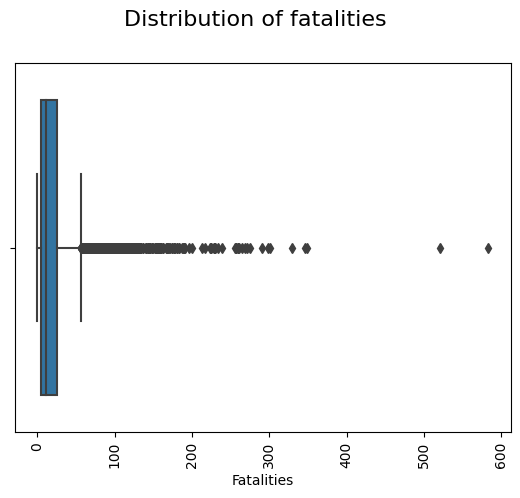

In [223]:
plt.xticks(rotation=90)
plt.suptitle('Distribution of fatalities' , size = 16, y = 0.99)
sns.boxplot(x ='Fatalities', data =df2)

### Observation: The data is evenly distributed.

## 3.6 Predictor Variable

[Text(0.5, 1.0, 'Ground')]

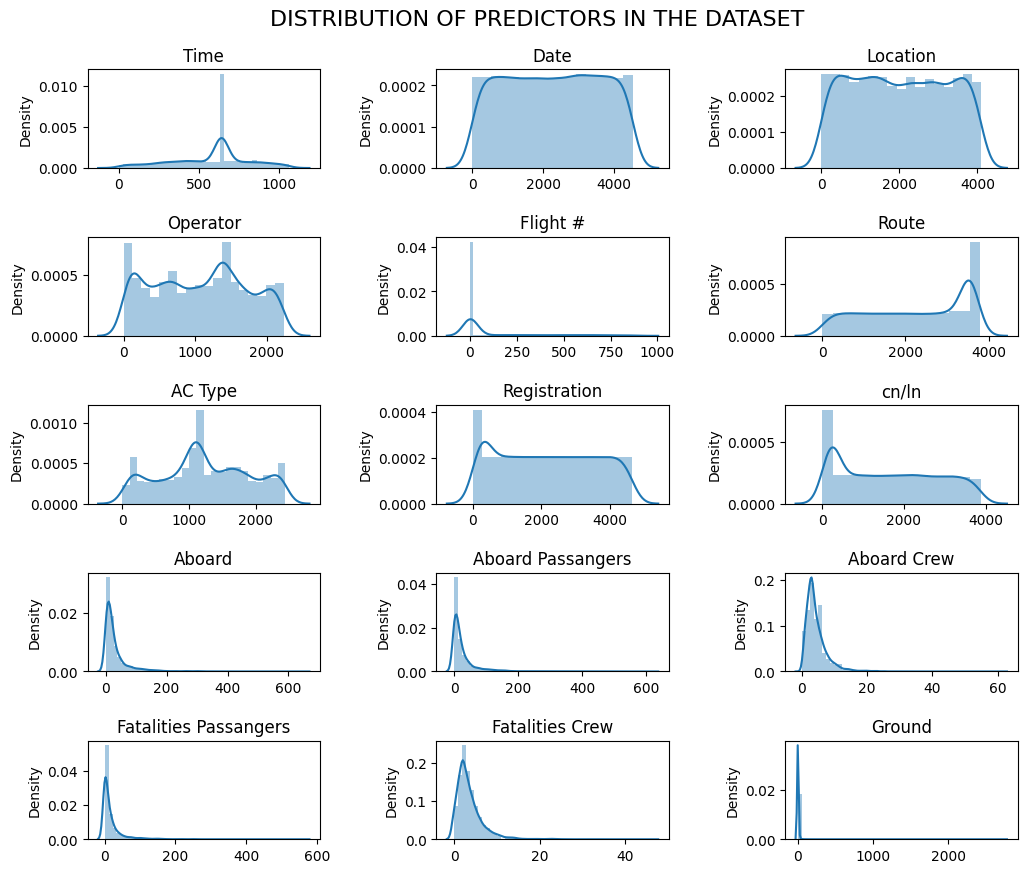

In [224]:
fig, axes = plt.subplots(5,3,  figsize=(12,10))
fig.subplots_adjust(hspace=0.7, wspace=0.5)
fig.suptitle('DISTRIBUTION OF PREDICTORS IN THE DATASET', size = 16, y=0.94);

sns.distplot(x=df2['Time'], ax=axes[0][0]).set(title = 'Time' )
sns.distplot(x=df2['Date'], ax=axes[0][1]).set(title = 'Date')
sns.distplot(x=df2['Location'], ax=axes[0][2]).set(title = 'Location')
sns.distplot(x=df2['Operator'], ax=axes[1][0]).set(title = 'Operator')
sns.distplot(x=df2['Flight #'], ax=axes[1][1]).set(title = 'Flight #')
sns.distplot(x=df2['Route'], ax=axes[1][2]).set(title = 'Route')
sns.distplot(x=df2['AC Type'], ax=axes[2][0]).set(title = 'AC Type')
sns.distplot(x=df2['Registration'], ax=axes[2][1]).set(title = 'Registration')
sns.distplot(x=df2['cn/ln'], ax=axes[2][2]).set(title = 'cn/ln')
sns.distplot(x=df2['Aboard'], ax=axes[3][0]).set(title = 'Aboard')
sns.distplot(x=df2['Aboard Passangers'], ax=axes[3][1]).set(title = 'Aboard Passangers')
sns.distplot(x=df2['Aboard Crew'], ax=axes[3][2]).set(title = 'Aboard Crew')
sns.distplot(x=df2['Fatalities Passangers'], ax=axes[4][0]).set(title = 'Fatalities Passangers')
sns.distplot(x=df2['Fatalities Crew'], ax=axes[4][1]).set(title = 'Fatalities Crew')
sns.distplot(x=df2['Ground'], ax=axes[4][2]).set(title = 'Ground')

## Relationship between the predictors and the target variable

<Axes: xlabel='Fatalities', ylabel='Time'>

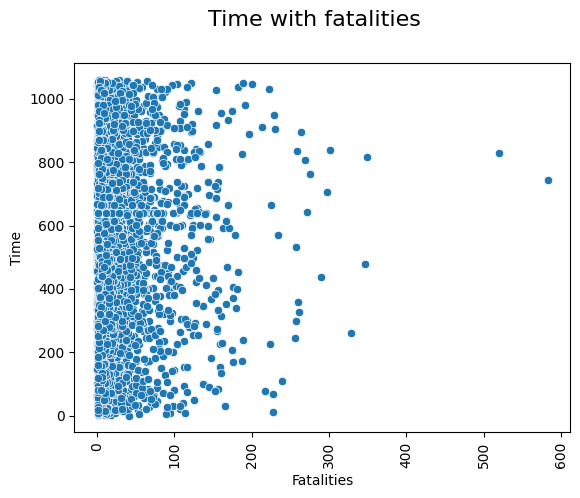

In [225]:
plt.xticks(rotation=90)
plt.suptitle('Time with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Time'])

<Axes: xlabel='Fatalities', ylabel='Date'>

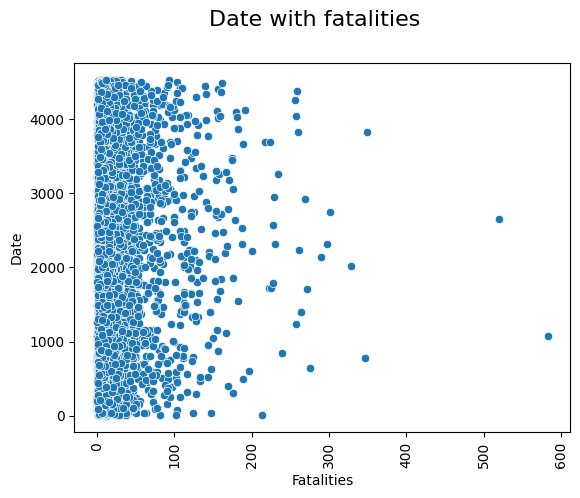

In [226]:
plt.xticks(rotation=90)
plt.suptitle('Date with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Date'])

<Axes: xlabel='Fatalities', ylabel='Location'>

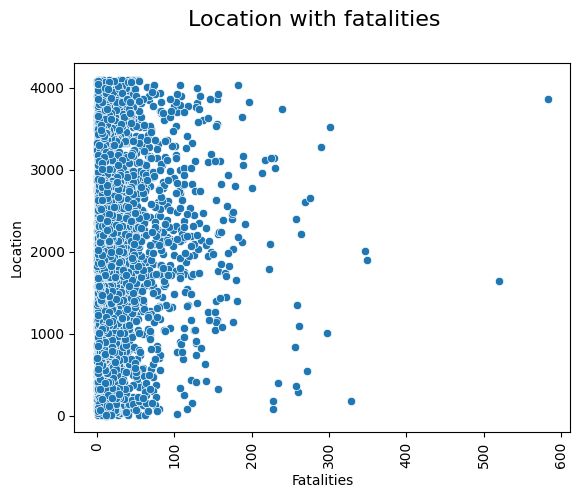

In [227]:
plt.xticks(rotation=90)
plt.suptitle('Location with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Location'])

<Axes: xlabel='Fatalities', ylabel='Operator'>

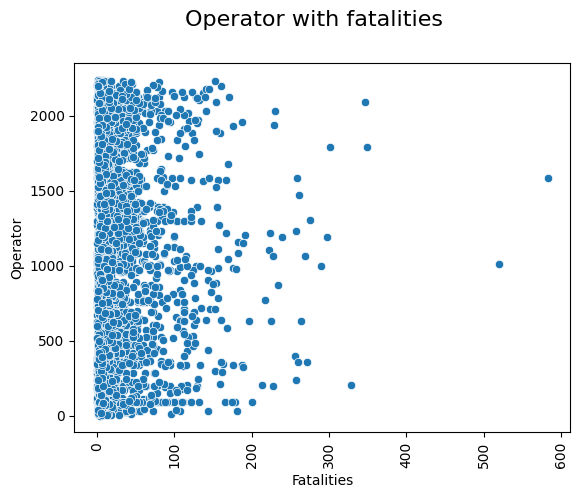

In [229]:
plt.xticks(rotation=90)
plt.suptitle('Operator with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Operator'])

<Axes: xlabel='Fatalities', ylabel='Flight #'>

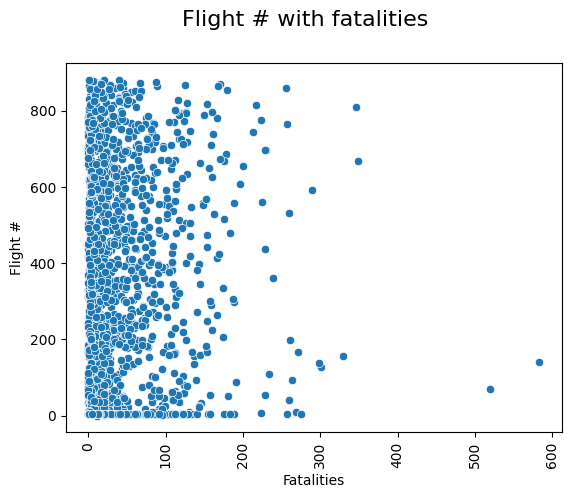

In [231]:
plt.xticks(rotation=90)
plt.suptitle('Flight # with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Flight #'])

<Axes: xlabel='Fatalities', ylabel='Route'>

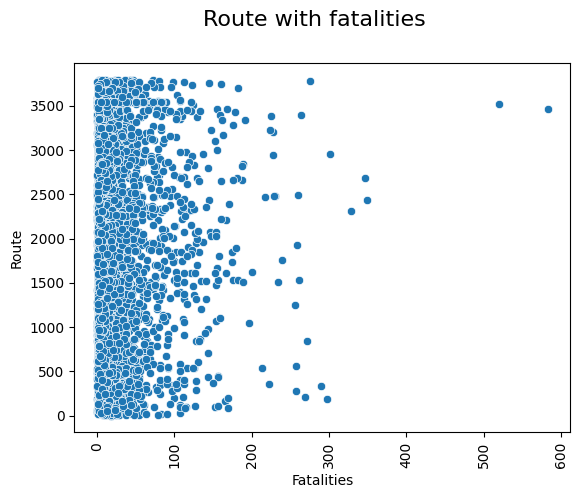

In [232]:
plt.xticks(rotation=90)
plt.suptitle('Route with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Route'])

<Axes: xlabel='Fatalities', ylabel='AC Type'>

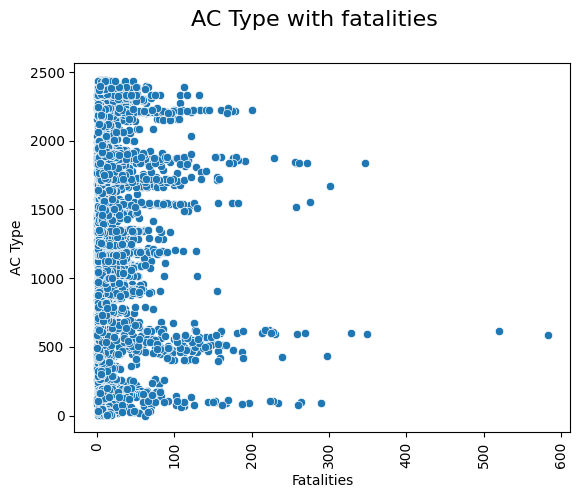

In [233]:
plt.xticks(rotation=90)
plt.suptitle('AC Type with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['AC Type'])

<Axes: xlabel='Fatalities', ylabel='Registration'>

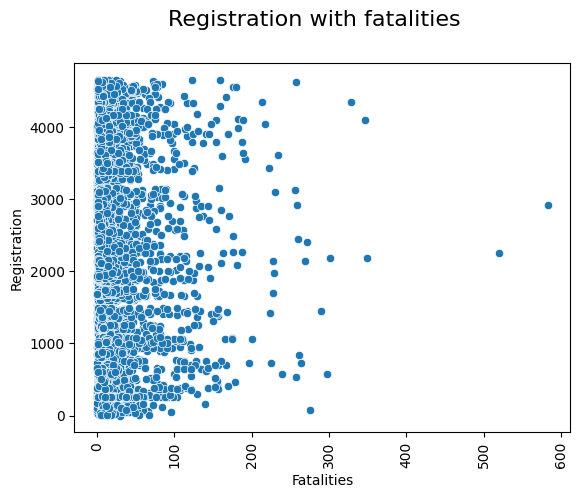

In [234]:
plt.xticks(rotation=90)
plt.suptitle('Registration with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Registration'])

<Axes: xlabel='Fatalities', ylabel='cn/ln'>

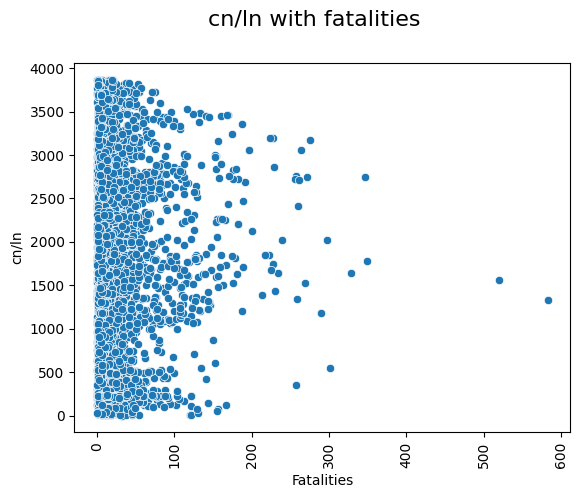

In [235]:
plt.xticks(rotation=90)
plt.suptitle('cn/ln with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['cn/ln'])

<Axes: xlabel='Fatalities', ylabel='Aboard'>

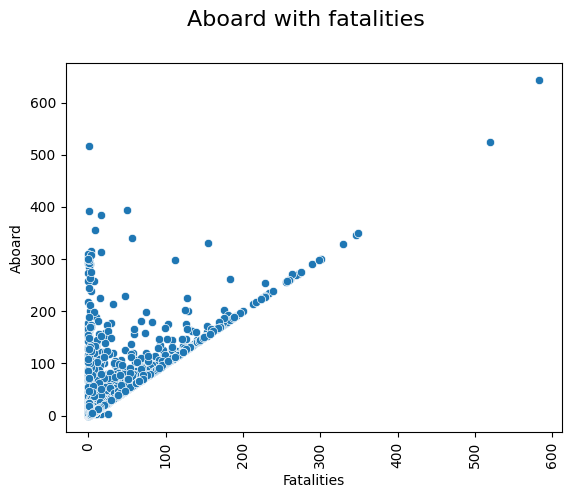

In [236]:
plt.xticks(rotation=90)
plt.suptitle('Aboard with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Aboard'])

<Axes: xlabel='Fatalities', ylabel='Aboard Passangers'>

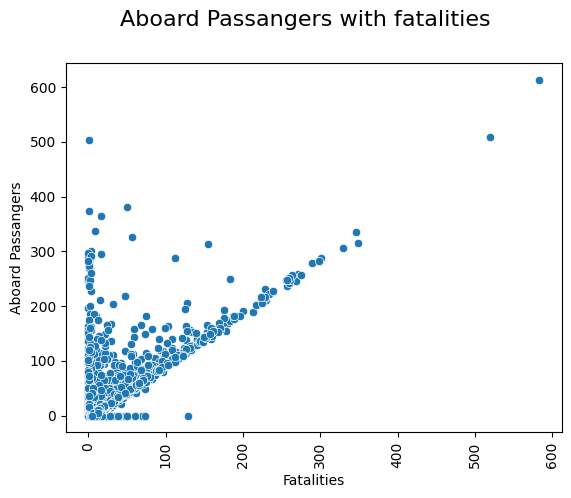

In [237]:
plt.xticks(rotation=90)
plt.suptitle('Aboard Passangers with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Aboard Passangers'])

<Axes: xlabel='Fatalities', ylabel='Aboard Crew'>

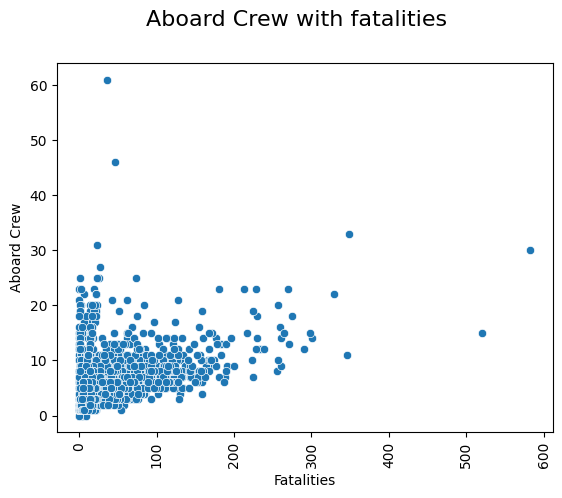

In [238]:
plt.xticks(rotation=90)
plt.suptitle('Aboard Crew with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Aboard Crew'])

<Axes: xlabel='Fatalities', ylabel='Fatalities Passangers'>

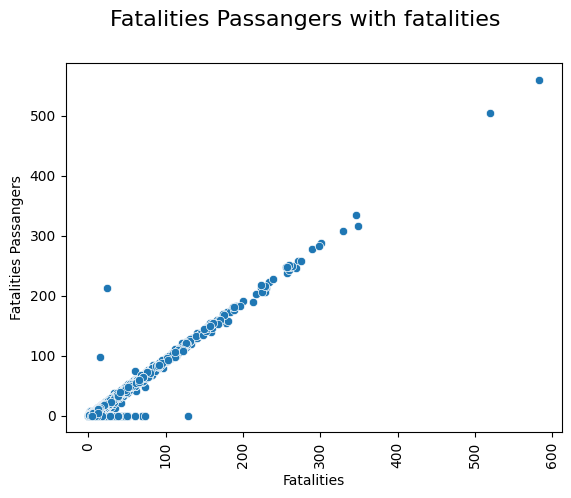

In [239]:
plt.xticks(rotation=90)
plt.suptitle('Fatalities Passangers with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Fatalities Passangers'])

<Axes: xlabel='Fatalities', ylabel='Fatalities Crew'>

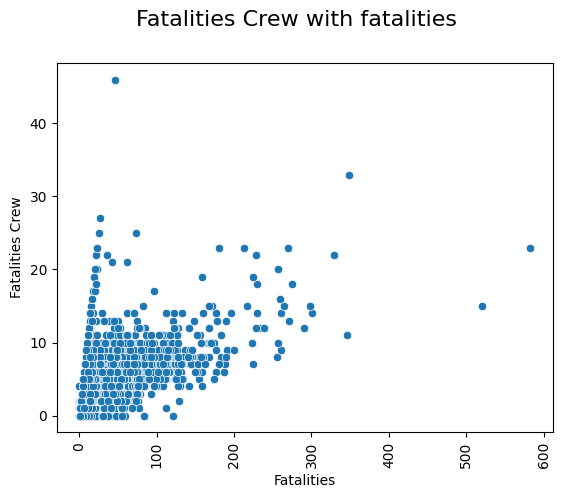

In [240]:
plt.xticks(rotation=90)
plt.suptitle('Fatalities Crew with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Fatalities Crew'])

<Axes: xlabel='Fatalities', ylabel='Ground'>

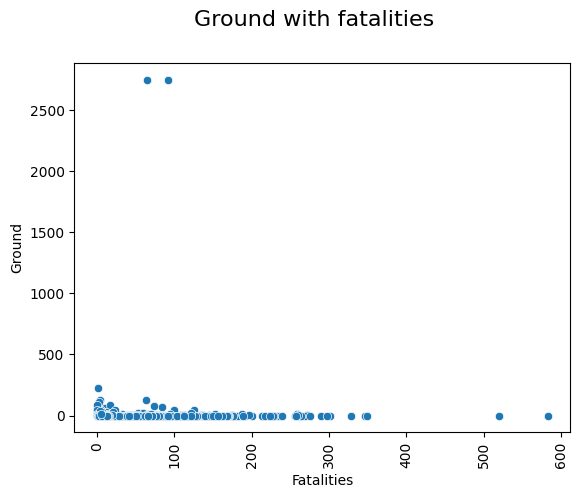

In [241]:
plt.xticks(rotation=90)
plt.suptitle('Ground with fatalities', size =16, y=0.99)
sns.scatterplot(x=df2['Fatalities'], y=df2['Ground'])

The charts above shows the graphical representation of each predictor variable against the target variable. It connotes how each predictor variable affects the fatality of a plane crash in the according to the given datasets and that is end part of EDA

## 4.0 DATA MODELLING

In this phase, i will be testing different models so as to choose the best performing one

In [244]:
y = df2['Fatalities']
X = df2.drop('Fatalities', axis = 1)


In [254]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size = 0.2)

### 4.1 LogisticRegression

In [257]:
model1 = LogisticRegression()

In [258]:
model1.fit(trainX, trainy)

LogisticRegression()

In [260]:
result1 = model1.predict(testX)

In [261]:
result1

array([  1.,   0.,   1.,   1.,   1.,   3.,  14.,   2.,   1.,   1.,   1.,
         1.,   1.,   2.,   1.,   1.,   1.,   4.,   1.,   1.,   3.,   1.,
         1.,   1.,   1.,   1.,   3.,   2.,  39.,   1.,   1.,  58.,   1.,
         1.,   1.,  56.,   1.,   1.,   2.,   2.,   1.,   2.,   2.,  81.,
         1.,   2.,   1.,   1.,   1.,   4.,  56.,   1.,   3., 196.,   1.,
         2.,   1.,   1.,   2.,   2.,   1.,   3.,   1.,   2.,   1.,   1.,
         1., 196.,   1.,   1.,   3.,   1.,   1.,   1.,   1.,   2.,   1.,
         6.,   1.,  20.,   1.,   1.,   1.,   1.,   1.,   3.,   1.,   2.,
         2.,  55.,  14.,   2.,   1., 196.,   1.,   1.,  41.,   1.,   1.,
         1.,   1.,   1.,   1.,  44.,   1.,   1.,  64.,   1.,   2.,   1.,
         1.,   1.,  12.,   1.,   4.,   1.,  16.,   2.,   1.,   1.,   1.,
        44.,   1.,   1.,  20.,   1.,   1.,  17.,  81.,   2.,  10.,   2.,
         1.,   1., 102.,   3.,   1.,   1.,   1.,   1.,   1.,  59.,   1.,
         1.,   1.,   1.,   4.,   2.,   4.,   1.,   

In [262]:
print(classification_report(result1, testy))

              precision    recall  f1-score   support

         0.0       0.05      0.06      0.06        16
         1.0       0.68      0.08      0.15       516
         2.0       0.15      0.07      0.10       157
         3.0       0.28      0.12      0.17       154
         4.0       0.00      0.00      0.00        20
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         5
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         2
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         4
        13.0       0.00      0.00      0.00         1
        14.0       0.05      0.08      0.06        12
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         1
        17.0       0.00    

### 4.2 DecisionTreeClassifier

In [263]:
model2 = DecisionTreeClassifier()

In [268]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size = 0.2)

In [269]:
model2.fit(trainX, trainy)

DecisionTreeClassifier()

In [271]:
result2 = model2.predict(testX)

In [272]:
result2

array([  4.,   2., 107.,   1.,   8.,   3.,   1.,   9.,  66.,  18.,   1.,
        18.,  11.,  15.,   7.,   8.,  17.,   6.,  14.,   3.,  13.,  13.,
        12.,  27.,  19., 123.,  25.,  46., 167.,  20.,  10.,   3.,  23.,
        13.,   2.,  11.,  15.,  23.,  29.,  11.,  19.,  36.,  31.,  14.,
        18.,   3.,   5.,   3.,  30.,   6.,   5.,   9.,  18.,   3.,   6.,
         2.,   2.,  23.,  10.,   2.,   1.,  17.,   5.,  22.,   2.,   4.,
         3.,   3.,   5.,  87.,  87.,   1.,   5.,   9.,  25.,   6.,  28.,
        20.,   1.,  40.,  44.,   1.,   7.,  46.,   1.,  28.,   5.,  18.,
         6.,   1.,  16.,   2.,  16.,  10.,   3.,  28.,  18.,   8.,  33.,
        23.,  18.,   3.,   5.,  25.,  13.,   1.,  23.,  17.,  18.,  16.,
        68.,  18.,  26.,  23.,   1.,  20.,  14.,   4.,   7.,  44.,  40.,
        13.,  18.,   2.,  80.,   5.,   7.,   6.,   1.,  37.,   5.,  60.,
         2.,   3.,   3.,   3.,   2.,   8.,  37.,  11.,   5.,   3.,  10.,
         8.,  13.,  23.,   1.,  65.,  22.,   4.,  4

In [273]:
print(classification_report(result2, testy))

              precision    recall  f1-score   support

         0.0       0.75      0.53      0.62        17
         1.0       0.86      0.88      0.87        89
         2.0       0.78      0.70      0.74        71
         3.0       0.78      0.80      0.79        84
         4.0       0.53      0.69      0.60        39
         5.0       0.61      0.59      0.60        37
         6.0       0.65      0.88      0.75        34
         7.0       0.62      0.54      0.58        24
         8.0       0.48      0.50      0.49        24
         9.0       0.68      0.66      0.67        29
        10.0       0.60      0.58      0.59        26
        11.0       0.56      0.40      0.47        25
        12.0       0.60      0.58      0.59        26
        13.0       0.62      0.52      0.56        31
        14.0       0.33      0.41      0.37        17
        15.0       0.63      0.52      0.57        23
        16.0       0.65      0.55      0.59        20
        17.0       0.35    

## 4.3 RandomForestClassifier

In [274]:
model3 = RandomForestClassifier()

In [276]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size = 0.2)

In [278]:
model3.fit(trainX, trainy)

RandomForestClassifier()

In [279]:
result3 = model3.predict(testX)

In [281]:
result3

array([ 46.,  13.,   1.,  10.,  50.,   2., 121.,   4., 143.,   2.,  23.,
         1.,   7.,  34.,  29.,  25.,   3.,  40.,  11.,   4.,   8.,  20.,
       117., 117.,   3., 168.,  23.,   3.,   6.,   4.,   7.,   1.,  13.,
         1.,  14.,  72.,   5.,   5.,   7.,  12.,   3.,   1.,  12.,   1.,
       160.,  40.,  23.,   3.,   2.,  39.,  30.,  12.,  14.,   8.,   7.,
         5.,   3.,   7.,  11.,  12.,  21.,   4.,  13.,  88.,   1.,   5.,
         2.,  24.,  13.,   3.,   2.,  11.,  18.,  14.,  16.,   2.,  17.,
         5.,  30.,   1.,   2.,   4.,  27.,   7.,   1.,   0.,   7.,  23.,
         5.,  21.,  23.,   4.,   2.,  70.,   2.,  21.,  19.,  13.,  28.,
         8.,  26.,   5.,   9.,  28.,  67.,   1.,   2.,   8., 154.,  19.,
        13.,  10.,   8., 224.,   6.,   3.,   6.,   8.,  13.,   2.,  42.,
         3.,  74.,  13.,   1.,  13.,   7.,  31.,   3., 196., 168.,   4.,
        44.,  22.,   3.,  24.,  23.,   4.,  16.,   4.,   2.,  29.,  27.,
        23.,  25.,  23.,  93.,   6.,  15.,  21.,   

In [283]:
print(classification_report(result3,testy))

              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         6
         1.0       0.92      0.84      0.88        77
         2.0       0.88      0.86      0.87        73
         3.0       0.84      0.79      0.82        73
         4.0       0.70      0.81      0.75        52
         5.0       0.88      0.81      0.85        54
         6.0       0.79      0.66      0.72        41
         7.0       0.84      0.73      0.78        37
         8.0       0.67      0.80      0.73        25
         9.0       0.74      0.67      0.70        30
        10.0       0.77      0.80      0.78        25
        11.0       0.70      0.86      0.78        22
        12.0       0.61      0.67      0.64        21
        13.0       0.77      0.50      0.61        40
        14.0       0.46      0.55      0.50        22
        15.0       0.57      0.67      0.62        12
        16.0       0.59      0.65      0.62        20
        17.0       0.67    

## 4.4 KNeighborsClassifier

In [284]:
model4 = KNeighborsClassifier()

In [285]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size = 0.2)

In [287]:
model4.fit(trainX, trainy)

KNeighborsClassifier()

In [288]:
result4 = model4.predict(testX)

In [289]:
result4

array([10.,  1., 11.,  3.,  1.,  6.,  6.,  9.,  2.,  3.,  2.,  1.,  2.,
        3.,  7., 21.,  0., 17.,  8.,  2.,  1.,  5.,  3., 11.,  6.,  7.,
        3.,  3.,  1.,  2.,  5., 16.,  2., 15.,  1.,  2.,  1.,  1.,  2.,
        2.,  2.,  6.,  2., 10.,  1.,  1.,  1.,  2.,  3.,  1.,  7.,  3.,
        7.,  9.,  0.,  1., 13.,  2., 14.,  3.,  9.,  2., 14., 18.,  4.,
        2.,  2.,  4., 18.,  1.,  2.,  3.,  1.,  3.,  5.,  5.,  1., 23.,
        2.,  3.,  3.,  5.,  6.,  0., 15.,  3.,  3.,  3.,  2.,  3.,  2.,
        3.,  5.,  6.,  4.,  2.,  3.,  4.,  5.,  1.,  2., 17.,  1.,  1.,
       12.,  2.,  3.,  3.,  1.,  1.,  2.,  2.,  7.,  4.,  3.,  2., 30.,
        1.,  3.,  1.,  2.,  1., 10.,  1.,  3.,  1.,  7.,  2.,  2.,  2.,
       11., 23.,  3.,  1.,  6., 20., 16., 19.,  4.,  3.,  1.,  1., 15.,
        0.,  7.,  2.,  2.,  1.,  1.,  1.,  3., 21.,  3.,  2.,  5., 12.,
       22.,  4.,  1.,  3., 15.,  5., 11.,  1.,  3.,  6.,  2.,  1.,  1.,
        3.,  1., 10.,  5.,  6.,  1., 17.,  3.,  2.,  1.,  6.,  1

In [290]:
print(classification_report(result4, testy))

              precision    recall  f1-score   support

         0.0       0.11      0.04      0.06        54
         1.0       0.33      0.13      0.18       239
         2.0       0.22      0.09      0.13       184
         3.0       0.28      0.14      0.18       154
         4.0       0.08      0.05      0.06        75
         5.0       0.10      0.09      0.10        55
         6.0       0.03      0.03      0.03        38
         7.0       0.00      0.00      0.00        30
         8.0       0.04      0.07      0.05        15
         9.0       0.07      0.12      0.09        16
        10.0       0.05      0.12      0.07        17
        11.0       0.00      0.00      0.00        11
        12.0       0.00      0.00      0.00        14
        13.0       0.00      0.00      0.00         8
        14.0       0.05      0.09      0.06        11
        15.0       0.00      0.00      0.00        10
        16.0       0.05      0.20      0.08         5
        17.0       0.00    

## 4.5 SVC

In [292]:
model5 = SVC()

In [293]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size = 0.2)

In [294]:
model5.fit(trainX, trainy)

SVC()

In [295]:
result5 = model5.predict(testX)

In [296]:
result5

array([2., 1., 3., 1., 1., 2., 1., 1., 1., 1., 1., 2., 3., 3., 1., 2., 2.,
       2., 1., 2., 2., 1., 1., 3., 2., 3., 3., 2., 1., 2., 3., 2., 1., 2.,
       3., 1., 2., 3., 1., 1., 1., 3., 1., 2., 1., 2., 2., 1., 3., 2., 2.,
       2., 2., 3., 3., 3., 1., 1., 2., 1., 3., 3., 2., 1., 2., 1., 1., 3.,
       1., 1., 1., 1., 3., 2., 3., 2., 3., 1., 2., 3., 2., 1., 2., 2., 2.,
       2., 2., 3., 2., 1., 3., 1., 1., 3., 2., 2., 3., 2., 2., 2., 1., 2.,
       2., 1., 2., 2., 1., 3., 2., 1., 3., 2., 1., 1., 1., 2., 3., 3., 3.,
       2., 1., 1., 2., 1., 1., 3., 2., 1., 2., 2., 1., 3., 2., 2., 3., 2.,
       1., 2., 3., 1., 2., 3., 3., 2., 1., 1., 1., 2., 3., 1., 3., 1., 3.,
       1., 2., 1., 3., 3., 1., 3., 1., 1., 1., 1., 1., 2., 3., 3., 1., 2.,
       1., 2., 2., 1., 3., 1., 3., 3., 3., 3., 1., 1., 3., 3., 2., 2., 3.,
       2., 3., 2., 3., 1., 3., 2., 3., 1., 2., 3., 1., 2., 2., 2., 2., 2.,
       1., 3., 3., 1., 3., 1., 2., 3., 1., 3., 3., 2., 2., 1., 1., 3., 2.,
       1., 2., 1., 2., 1.

In [297]:
print(classification_report(result5,testy))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.47      0.08      0.14       397
         2.0       0.27      0.06      0.10       312
         3.0       0.39      0.09      0.15       285
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0
        11.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         0
        15.0       0.00      0.00      0.00         0
        16.0       0.00      0.00      0.00         0
        17.0       0.00    

After testing several models in searching of the most performing one,RandomForestClassifier is thereby the most performing model with the accuracy figure of 0.64